In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Regression



== [[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]
 [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5]]
=Y= [[-3.  -3.  -3.  -3.  -3.  -3.  -3.  -3.  -3.  -3.  -3.  -3. ]
 [-2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5 -2.5]
 [-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 -1.5 

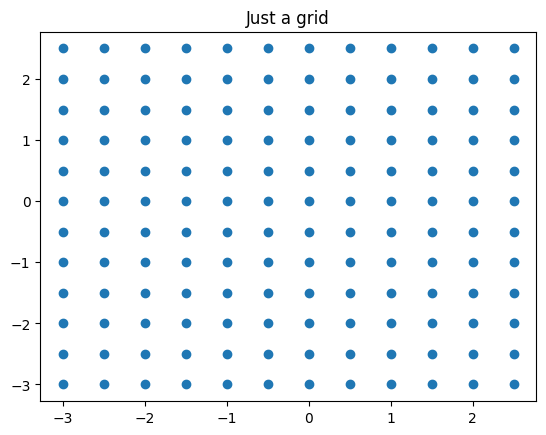

<Figure size 640x480 with 0 Axes>

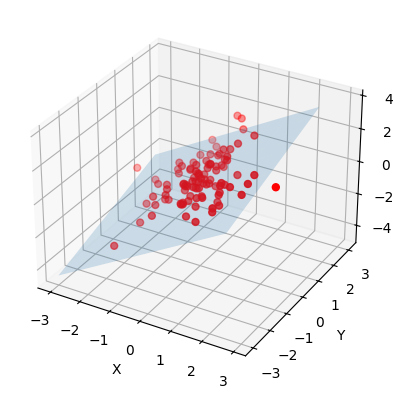

In [17]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# some 3-dim points
mean = np.array([0.0,0.0,0.0])
cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
data = np.random.multivariate_normal(mean, cov, 100)
#print(data)
#print("===")

# At the moment, points are a collection along the rows (matrix)


# regular grid covering the domain of the data
X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
print("==",X)
print("=Y=",Y)

XX = X.flatten()
YY = Y.flatten()

points = np.stack([XX,YY]).T
print(points.shape)
plt.scatter(points[:,0],points[:,1])
plt.title("Just a grid")
plt.show()


A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients

Z = C[0]*X + C[1]*Y + C[2]

plt.clf()
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=25)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

# Adiabatic Quantum Computing - Formulating Quadratic Unconstrained Binary Optimization

$$
x^t M x
$$
such that M is a real matrix and x is binary vectors only.

An adiabatic QC will search for the binary vector x that minimizes the expression

In [37]:
def bf(M,x):
    """ Computes a bilinear form value flattening the input """
    x = np.array(x).transpose()  
    M = np.array(M)
    #print(M)
    return x.flatten()  @ M @ x.flatten().reshape(-1,1)
    

In [50]:
bf ([[2,0],[0,3]], [1,1])

array([5])

In [34]:
bf([[2,0],[0,5]], [0,0])

[[2 0]
 [0 5]]


array([0])

Buy a cake or a chocolate. The cake costs 2€, the chocolate 5€. A binary vector (a,b) tells us if you bought a chocolate (first entry $a$) or if you bought a cake (5€). How can we use a quadratic form to compute the cost of all four binary vectors?

The total price equation is
$$
2a + 5b
$$

Now, we want to constrain your choice (it is obviously minimal to buy nothing) in a way that you at least buy one. As QUBOs don't allow for constraints outside the matrix, we will add penalty terms to the game in a way, such that buying nothing is expensive.
$$
(1-a)(1-b)
$$
is one if and only if a and b are zero.

Thus, for a sufficiently large $P$, for example $P=8$, we obtain
$$
P(1-a)(1-b) = P(1-a-b+ab)=P - Pa - Pb + Pab
$$
a set of linear terms. Can we put it into a linear form?

In [48]:
P=np.array([[-8,8],[0,-8]])
print(P)
for v in [[0,0],[0,1],[1,0],[1,1]]:
    print("CHoice: ",v, bf(P,v))

[[-8  8]
 [ 0 -8]]
CHoice:  [0, 0] [0]
CHoice:  [0, 1] [-8]
CHoice:  [1, 0] [-8]
CHoice:  [1, 1] [-8]


In this way, we can build our linaer form such that the minimum is **not** achieved for (0,0) which means buy nothing.

$$
x^t M x + x^t P x = x^t (M+P) x
$$

In [49]:
M = np.array([[2,0],[0,5]])
Q = M + P  # QUBO

print("0,0", bf(Q,[0,0]))
print("0,1", bf(Q,[0,1]))
print("1,0", bf(Q,[1,0]))
print("1,1", bf(Q,[1,1]))


0,0 [0]
0,1 [-3]
1,0 [-6]
1,1 [-1]


# Basic Plotting Recap
Basic plotting tool is matplotlib which resembles the MATLAB plotting API to a certain extent